[0.30194147]


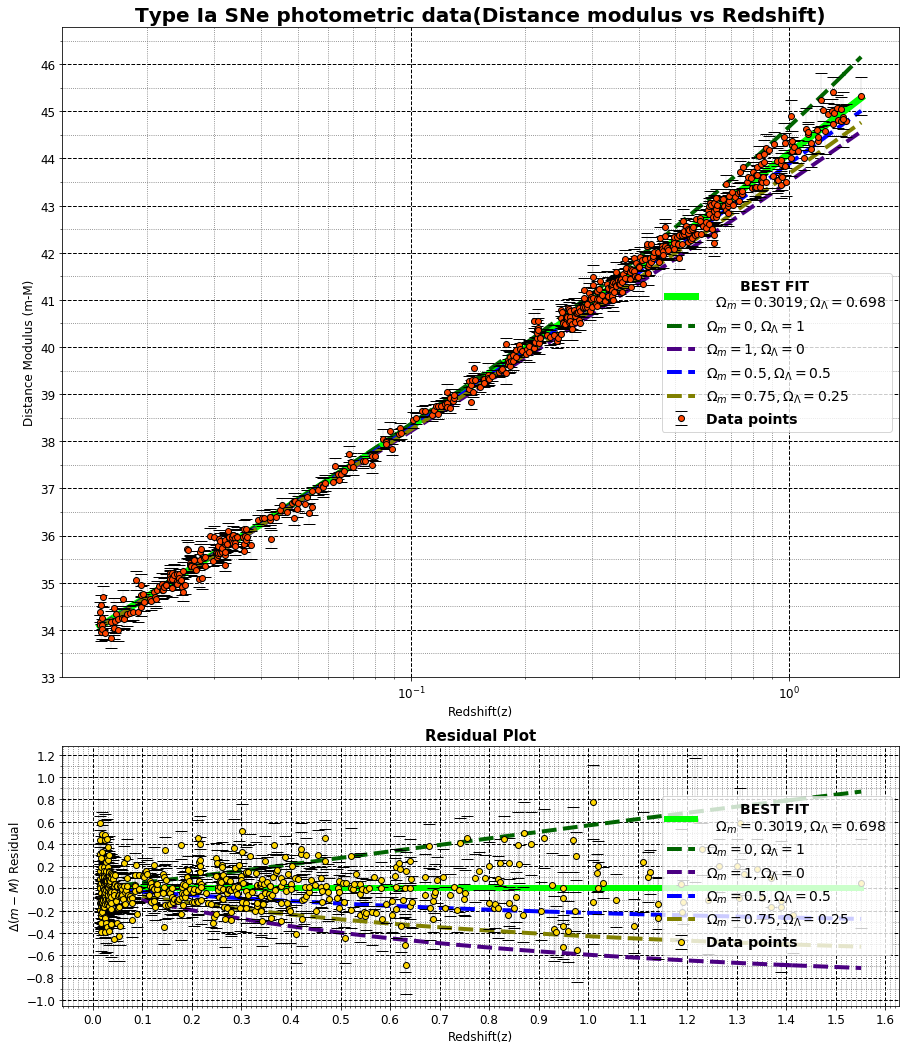

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.integrate as integrate
from matplotlib.ticker import (AutoMinorLocator, FormatStrFormatter,MultipleLocator)


plt.rcParams.update({'font.size': 12})
#import matplotlib
#matplotlib.rcParams.update({'errorbar.capsize': 20})

k=4304.16
data=np.loadtxt('SCPUnion2.1_mu_vs_z low error.txt',dtype=float,skiprows=1)
z_data=data[:,0]
dist_mod=data[:,1]
sigma_err=data[:,2]


def integrand(z, args):
    omega_m0, = args
    e = omega_m0 * ((1 + z) ** 3) + (1 - omega_m0)
    return k / (np.sqrt(e))


def curve(z, omega_m0):
    beta = [integrate.quad(integrand, 0.0, zd, [omega_m0])[0] for zd in z]
    dl = (1 + z) * beta
    DM = 5 * (np.log10((np.abs(dl)))) + 25
    #print(omega_m0)

    return DM


# vcurve = np.vectorize(curve, excluded=set([1]))
popt, pcov = curve_fit(curve, z_data, dist_mod, absolute_sigma=True, sigma=sigma_err, bounds=(0, 1),p0=0.4)
print(popt)

#   dl=(1+z)*res[0]*k
#   m_diff= 5*np.log10(dl)+25
#    return m_diff



Arr=curve(z_data,popt)#best_fit

fig,ax=plt.subplots(2,figsize=(15,18),sharex=False,gridspec_kw={'hspace': 0.15,'wspace':1,'height_ratios': [2.5, 1]})
ax[0].semilogx(z_data,Arr,color='lime',lw='7',label='       BEST FIT  \n  '+r'$\Omega_m=0.3019, \Omega_{\Lambda}=0.698 $')
ax[0].plot(z_data,curve(z_data,0),color='darkgreen',lw='4',ls='--',label=r'$\Omega_m=0 , \Omega_{\Lambda}=1 $')#omega_m=0
ax[0].plot(z_data,curve(z_data,1),color='indigo',lw='4',ls='--',label=r'$\Omega_m=1 , \Omega_{\Lambda}=0 $') #omega_m=1
ax[0].plot(z_data,curve(z_data,0.5),color='blue',lw='4',ls='--',label=r'$\Omega_m=0.5 , \Omega_{\Lambda}=0.5$')#omega_m=0.5
ax[0].plot(z_data,curve(z_data,0.75),color='olive',lw='4',ls='--',label=r'$\Omega_m=0.75 , \Omega_{\Lambda}=0.25 $')#omega_m=0.75


#plt.plot(z_data,curve(z_data,0.3),'y--')
#ax[0].scatter(z_data,dist_mod)
ax[0].errorbar(z_data,dist_mod, yerr=sigma_err, marker='o', ecolor='k', capthick=30,color='k',
               ls='none',capsize=6,  markeredgewidth=1,elinewidth=0.1,markersize=6,markerfacecolor='orangered',
              label='Data points')

       #,markerfacecolor='blue', markeredgewidth=1

    
legend_properties = {'weight':'bold','size':'14'}

ax[0].set_xlabel('Redshift(z)')
ax[0].set_ylabel('Distance Modulus (m-M)')
ax[0].legend(fontsize='12',prop=legend_properties,loc='center right')
ax[0].set_title('Type Ia SNe photometric data(Distance modulus vs Redshift)',fontweight="bold",fontsize='20')




residual=dist_mod-Arr
res2=curve(z_data,0)-Arr#omega_m=0
res3=curve(z_data,1)-Arr#omega_m=1
res4=curve(z_data,0.5)-Arr #omega_m=0.5
res5=curve(z_data,0.75)-Arr #omega_m=0.75

#ax[1].scatter(z_data,residual,label='Data points')
ax[1].plot(z_data,Arr-Arr,lw='6',color='lime',label='       BEST FIT  \n  '+r'$\Omega_m=0.3019, \Omega_{\Lambda}=0.698 $')
ax[1].plot(z_data,res2,lw='4',ls='--',color='darkgreen',label=r'$\Omega_m=0 , \Omega_{\Lambda}=1 $')#omega_m=0
ax[1].plot(z_data,res3,lw='4',ls='--',color='indigo',label=r'$\Omega_m=1 , \Omega_{\Lambda}=0 $')
ax[1].plot(z_data,res4,lw='4',ls='--',color='blue',label=r'$\Omega_m=0.5 , \Omega_{\Lambda}=0.5$')
ax[1].plot(z_data,res5,lw='4',ls='--',color='olive',label=r'$\Omega_m=0.75 , \Omega_{\Lambda}=0.25 $')

ax[1].errorbar(z_data,residual, yerr=sigma_err,marker='o', ecolor='k', capthick=30,color='k',
               ls='none',capsize=6,  markeredgewidth=1,elinewidth=0.1,markersize=6,markerfacecolor='gold',label='Data points')
ax[1].set_xlabel('Redshift(z)')
ax[1].set_ylabel(r'$\Delta(m-M)$'+' Residual')

ax[1].set_title('Residual Plot',fontweight="bold",fontsize='15')
ax[1].legend(fontsize='12',prop=legend_properties,loc='center right')

#plt.show()



#plt.scatter(z, dist_mod)
#ax[0].xaxis.set_major_locator(MultipleLocator(0.1))
ax[0].yaxis.set_major_locator(MultipleLocator(1))
#ax[0].tick_params(axis='x', which='minor', bottom=False)

#ax[0].xaxis.set_minor_locator(AutoMinorLocator(0.025))
ax[0].yaxis.set_minor_locator(AutoMinorLocator(2.5))

ax[1].xaxis.set_major_locator(MultipleLocator(0.1))
ax[1].yaxis.set_major_locator(MultipleLocator(0.2))



#ticks
ax[1].xaxis.set_minor_locator(MultipleLocator(0.01))
ax[1].yaxis.set_minor_locator(MultipleLocator(0.1))

#ax[0].xaxis.set_minor_locator(MultipleLocator(0.01))
ax[0].yaxis.set_minor_locator(MultipleLocator(0.5))

#grid

ax[0].grid(which='major', alpha=1,color='black', linestyle='--',linewidth=1)
ax[0].grid(which='minor', color='dimgray', linestyle=':')

ax[1].grid(which='major', alpha=1,color='black', linestyle='--',linewidth=1)
ax[1].grid(which='minor', color='dimgray', linestyle=':')
#print(dist_mod,sigma)

plt.savefig('fig2.png')






In [3]:
import scipy.integrate as integrate
z=100
'''def I(z, omega_m0):
    E= omega_m0 * ((1 + z) ** 3) + (1-omega_m0)
    I=1/(np.sqrt(E))
    return I'''
def E(z,omega_m0):

    e = omega_m_0 * ((1 + z) ** 3) + (1-omega_m0)
    return 1/(np.sqrt(e))

la1=np.zeros(len(z))
for i in range(len(z)):
    la1[i]=integrate.quad(E,0,z[i],args=(0.0))[0]*(1+z[i])*k

dl=np.zeros(len(z))
for i in range(len(z)):
    dl[i]=integrate.quad(E,0,z[i],args=(0.3))[0]*(1+z[i])*k
    
print(dl)

        
    
'''def distance_modulus(z, omega_m):
    omega_de=1-omega_m;
    
    dm=np.zeros(len(z))
    
    U=np.zeros(len(z))
    for i in range(len(z)):
            U[i]=k*(1+z[i])*integrate.quadrature(I, 0.0, z[i],[omega_m])[0]
   
        
    for j in range(len(z)):
        dm[j]=5*np.log10(U[i])+25
        
    return dm
        
        
    
        
dm1=distance_modulus(z,0.3)
#plt.plot(z,dm1)'''
    

    
    
    

TypeError: object of type 'int' has no len()

In [ ]:
fig,ax=plt.subplots(figsize=(10,8))

plt.scatter(z, dist_mod)
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(1))

ax.xaxis.set_minor_locator(AutoMinorLocator(0.1/4))
#ax.yaxis.set_minor_locator(AutoMinorLocator(2.5))

ax.grid(which='major', alpha=1,color='black', linestyle='--',linewidth=1.)
ax.grid(which='minor', color='black', linestyle='-.')
#print(dist_mod,sigma)